# Este archivo es el código base para la parte práctica del examen del tercer parcial de la clase de Inteligencia Artificial

## Instrucciones

Por favor lea cuidadosamente y codifique lo que se le pida. Las instrucciones se verán de la siguiente manera:
```
***# Este ese el formato para las instrucciones***
```

## Entregables

Se entrega individualmente un archivo comprimido en Zip que contenga:

*   La libreta de Colab (extensión ipynb)
*   Ls libreta de Colab en formato PDF; use la opción de imprimir para generarlo

## Evaluación

*   La celda requerida debe ejecutar sin errores: 1 pts
*   La celda requerida implementa el código solicitado: 1pts

## Código de ética profesional

Al entregar este archivo con sus implementaciones, acepta que el trabajo realizado es de su autoría y que de confirmarse lo contrario se anulará su examen.

Recuerde, el resultado de un trabajo por mérito propio siempre es satisfactorio


```
Haga doble clic para editar la celda y llenar los datos correspondientes:
```

Nombre del estudiante: Enrique Ulises Báez Gómez Tagle

Fecha de entrega: 31/05/2023




In [4]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# this is the library that contains the NN capabilities
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
# to meassure the execution time of the neural networks
import time

## Carga del conjunto de datos

`Cargue la base de datos gym-1sec.csv y muestre los primeros 5 registos:`

In [5]:
dataset = pd.read_csv(filepath_or_buffer='gym-1sec.csv', sep=',')

print('Dataset size {} columns and {} rows'.format(dataset.shape[1], dataset.shape[0]))

dataset.head()
dataset.tail()

Dataset size 6 columns and 10125 rows


,date,pre,alt,hum,tem,occ
10120,2019-09-24 16:17:05,94960.91,543.86,56.44,28.61,M
10121,2019-09-24 16:17:06,94958.60,544.06,56.48,28.61,M
10122,2019-09-24 16:17:07,94958.60,544.06,56.72,28.63,M
10123,2019-09-24 16:17:08,94961.06,543.85,56.99,28.64,M
10124,2019-09-24 16:17:09,94958.84,544.04,56.96,28.65,M


```
Visualice la cantidad de datos que hay en cada una de los differentes valores de la característica (feature) nivel de occupación.

La descripción de las variables es como sigue de izquierda a derecha:

*   Fecha de registro
*   Presión barométrica en hecto-pascal
*   Altura relativa desde el nivel del mar en metros
*   Humedad relativa en porcentaje
*   Temperatura en grados celcius
*   Nivel de ocupación en etiquetas
```



In [6]:
dataset.groupby('occ').size()

occ
H    2358
L    2442
M    5325
dtype: int64

```
Utilice el análisis de los 5 números para visualizar la descripción del cconjunto de datos
```



In [7]:
dataset.describe()

,pre,alt,hum,tem
count,10125.000000,10125.000000,10125.000000,10125.000000
mean,95171.915784,525.373692,56.746984,27.808434
std,169.404796,14.839785,2.293076,0.820957
min,94893.870000,501.210000,50.660000,25.880000
25%,95000.700000,509.410000,55.390000,27.210000
50%,95230.360000,520.240000,56.400000,27.490000
75%,95354.250000,540.370000,58.620000,28.510000
max,95447.960000,549.790000,65.390000,29.970000


## Visualización de los datos

```
Modifique el siguiente código para visualizar la humedad del gymnasio de todos los niveles de ocupación (en el eje y) respecto a la altura (en el eje x)

Nombre la gráfiica adecuadamente a los datos que se muestran
```



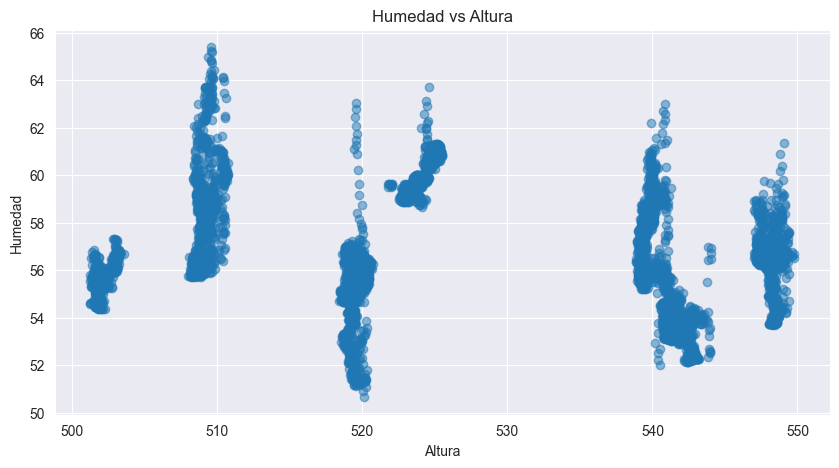

In [8]:
y = dataset['hum']
x = dataset['alt']

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Altura')
ax.set_ylabel('Humedad')
ax.set_title('Humedad vs Altura')
plt.show()


## Generación del conjunto de datos de entrenamiento y testeo

```
Genere los conjuntos de datos de entrenamiento y testeo de la siguiente manera:

*   El conjunto de testeo debe ser el 5% aleatorio del conjunto de datos total
*   Para el conjunto de entrenamiento, utilice todas las variables/características del conjunto de datos con excepción de:
 'date','occ'
*   Seleccione la varible de nivel de ocupación como la variable/característica de interés para hacer la clasificación
```



In [9]:
X = dataset.drop(['date', 'occ'], axis=1)
Y = dataset['occ']

# IF N, Convert to numpy array
X = np.array(X)
Y = np.array(Y)

# VALIDATE SHAPES
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

X shape: (10125, 4)
Y shape: (10125,)


## Escalamiento

```
Si es necesario escalar los datos hágalo; en caso contrario, escribir no es necesario escalar los datos en la celda como comentario
```



In [10]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# Determine if the data needs to be scaled
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the dataset are: \n{}'.format(X_train_scaled.min(axis=0)))
print('Max values of the dataset are: \n{}'.format(X_train_scaled.max(axis=0)))

print('Min values of the dataset are: \n{}'.format(X_test_scaled.min()))
print('Max values of the dataset are: \n{}'.format(X_test_scaled.max()))

Min values of the dataset are: 
date    2019-09-18 19:04:00
pre                94893.87
alt                  501.21
hum                   50.66
tem                   25.88
occ                       H
dtype: object
Max values of the dataset are: 
date    2019-10-02 20:48:58
pre                95447.96
alt                  549.79
hum                   65.39
tem                   29.97
occ                       M
dtype: object
Min values of the dataset are: 
[-1.64809243 -1.629142   -2.64754226 -2.35274138]
Max values of the dataset are: 
[1.63033299 1.65211843 3.76547249 2.63974148]
Min values of the dataset are: 
-2.328328262015973
Max values of the dataset are: 
3.0384029274199404


## Clasificación

### Definición del modelo

```
Defina un modelo de red neuronal con las siguientes características:

*   4 capas en total
*   La capa de salida debe tener el mimso número de neuronas que tipos/clases de nivel de ocupación
*   La capa de entrada debe tener el mismo número de neuroas que tipos/clases de nivel de ocupación
*   Las capas intermedias debe tener +2 y +1 del número de neuronas de entrada menos el número de características/variables eliminadas del conjunto de entrenamiento
*   Un máximo número de iteraciones del número de clases/tipos de nivel de ocupación multiplicado por 100
*   Usar la función de activación tangente hyperbólica
*   User el solucionador descenso de gradiente estocástico
```



In [24]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(Y_train.shape[0] + 2, Y_train.shape[0] + 1), activation='tanh',
                        solver='sgd', max_iter=Y_train.shape[0] * 100, random_state=42)

### Entrenamiento

```
Entrene el modelo definido con anterioridad y muestrer su tiempo de ejecución en segundos
```
**Importante:** esto puede tomar aproximadamente unos 5 minutos



In [ ]:
start_time = time.time()
mlp_clf.fit(X_train_scaled, Y_train)
end_time = time.time()

print('Elapsed time: {} seconds'.format(end_time - start_time))

### Testeo y evaluación del modelo

```
Utilice el modelo entrenado para hacer la clasificación de los datos de testeo
```



In [ ]:
from sklearn.metrics import classification_report

y_pred = mlp_clf.predict(X_test_scaled)
y_pred

print(classification_report(Y_test, y_pred))



```
Evalue el modelo de clasificación entrenado previamente para mostrar su accuracy
```


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: {}'.format(accuracy_score(Y_test, y_pred)))


```
Visualice la curva de entrenamiento
```



In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title('Loss Curve', fontsize=12)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


```
Visualice la matriz de confusión 
```



In [ ]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()


```
Con el valor del accuracy y las gráficas de entrenamiento y matriz de confusión explique brevemente el rendimiento del modelo de red neuronal entrenado
```



**Doble clic aquí para editar su respuesta**

### Búsqueda de hiperparámetros a través de una matriz



```
Defina una matriz de búsqueda de hiperparámetros que contenga lo siguiente:

*   Un modelo de red neuronal con el número de capas y neuronas que considere lleve a mejorar el aprendizaje en la tarea de clasificación
*   El número de iteraciones que consideren sean pertinentes
*   El optimizador adam
*   La función de activación hyperbolic relu
```



In [ ]:
param_grid = {
    'hidden_layer_sizes': [(Y_train.shape[0] + 2, Y_train.shape[0] + 1), (Y_train.shape[0] + 3, Y_train.shape[0] + 2),
                           (Y_train.shape[0] + 4, Y_train.shape[0] + 3)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'max_iter': [Y_train.shape[0] * 100, Y_train.shape[0] * 200, Y_train.shape[0] * 300]
}


```
Defina la búsqueda de la matriz sin validación cruzada
```



In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs=-1)


```
Execute la búsqueda de los hiperparámetros y muestre el tiempo total de execución
```

**Importante:** tenga en mente que esta sección puede tardar varios minutos, de acuerdo a los modelos incluídos en la búsqueda

In [ ]:
start_time = time.time()
grid.fit(X_train_scaled, Y_train)
end_time = time.time()

print('Elapsed time: {} seconds'.format(end_time - start_time))


```
Muestre el 'mejor modelo' de la búsqueda de los hiperparámetros
```



In [ ]:
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))
grid_results = pd.DataFrame(grid.cv_results_)


```
Obtenga y muestre las predicciones con el mejor modelo de la búsqueda de hiperparámetros
```



In [ ]:
grid_results.sort_values(by='rank_test_score', limit=1)

print('RANK')
grid_results.sort_values(by='rank_test_score')

print('Best model predictions: {}'.format(grid.best_estimator_.predict(X_test_scaled)))



```
Evalue el mejor modelo de clasificación resultante de la búsqueda de hiperparámetros para mostrar su accuracy
```



In [ ]:
best_model = MLPClassifier(hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'],
                           activation=grid.best_params_['activation'], solver=grid.best_params_['solver'],
                           max_iter=grid.best_params_['max_iter'], random_state=42)
best_model.fit(X_train_scaled, Y_train)

y_pred = best_model.predict(X_test_scaled)
print('Accuracy: {}'.format(accuracy_score(Y_test, y_pred)))

```
Visualice la matriz de confusión del mejor modelo de clasificación resultante de la búsqueda de hiperparámetros
```



In [ ]:
best_mode_confusion_matrix = pd.crosstab(Y_test, grid.best_estimator_.predict(X_test_scaled), rownames=['Actual'],
                                         colnames=['Predicted'])
sn.heatmap(best_mode_confusion_matrix, annot=True)
plt.show()

## Conclusiones

```
De acuerdo a los resultados de las métricas de evaluación y a las gráficas de matriz de confusión, mencione qué modelo de red neuronal se desempeñó mejor y por qué considera que fue así
```



**Doble clic aquí para editar su respuesta**

